<a href="https://colab.research.google.com/github/haribharadwaj/notebooks/blob/main/BME511/ImagingIntro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Review and extension of ideas to imaging

In the linear algebraic sense, and in the realm of topological inference, images behave exactly like signals and it is easy to extend all of the ideas from signals to images!

In [1]:
import numpy as np
import pylab as pl

# Setting it so figs will be a bit bigger
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [5, 3.33]
plt.rcParams['figure.dpi']  = 120

Text(0, 0.5, 'h(t)')

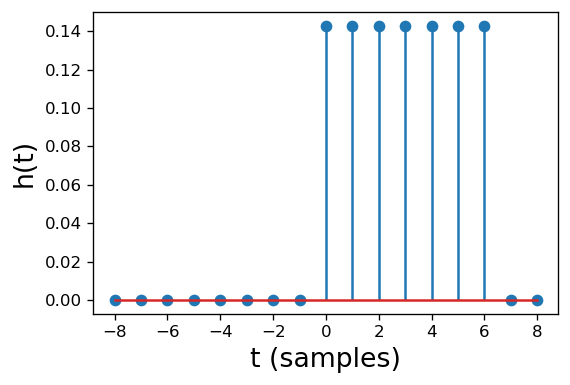

In [2]:
t = np.arange(-8, 9)
h1 = np.zeros(t.shape)
h1[np.logical_and(t < 7, t >=0)] = 1
h1 /= h1.sum()
pl.stem(t, h1)
pl.xlabel('t (samples)', fontsize=16)
pl.ylabel('h(t)', fontsize=16)

Text(0, 0.5, 'h(t)')

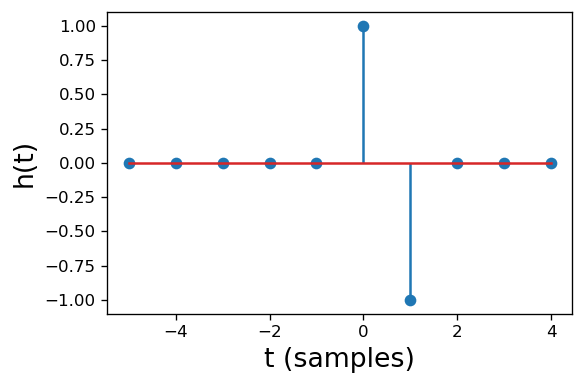

In [3]:
t = np.arange(-5, 5)
h2 = np.zeros(t.shape)
h2[t==0] = 1
h2[t==1] = -1

pl.stem(t, h2)
pl.xlabel('t (samples)', fontsize=16)
pl.ylabel('h(t)', fontsize=16)

## US COVID19 data example

Dataset was downloaded roughly when the US hit 500k deaths :(
The data start on Jan 13, 2020

In [4]:
import pandas as pd

dat = pd.read_csv('./COVIDhistoricalDeaths_Jan2020_Mar2021.csv')

In [5]:
dat.keys()

Index(['date', 'death', 'deathIncrease', 'inIcuCumulative', 'inIcuCurrently',
       'hospitalizedIncrease', 'hospitalizedCurrently',
       'hospitalizedCumulative', 'negative', 'negativeIncrease',
       'onVentilatorCumulative', 'onVentilatorCurrently', 'positive',
       'positiveIncrease', 'states', 'totalTestResults',
       'totalTestResultsIncrease'],
      dtype='object')

Text(0, 0.5, 'Total deaths (thousands)')

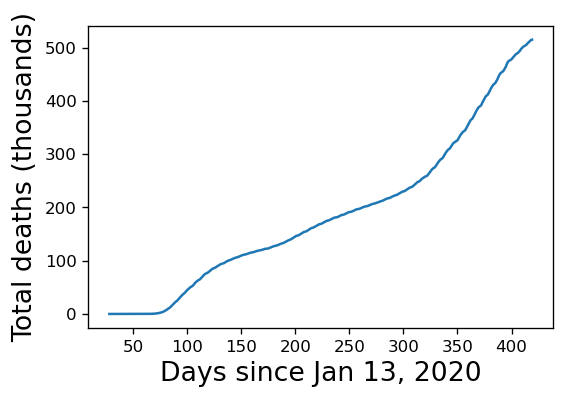

In [6]:
d = dat['death'].to_numpy()[::-1]  # The file has it in reverse date with top row being most recent
t = np.arange(d.shape[0])
pl.plot(t, d/1000)
pl.xlabel('Days since Jan 13, 2020', fontsize=16)
pl.ylabel('Total deaths (thousands)', fontsize=16)

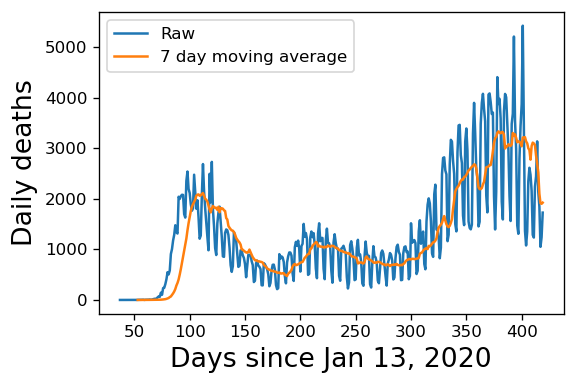

In [7]:
from scipy import signal

daily_deaths = signal.lfilter(h2, 1, d)
t = np.arange(daily_deaths.shape[0])
pl.plot(t, daily_deaths)

daily_deaths_ma = signal.lfilter(h1, 1, daily_deaths)
pl.plot(t, daily_deaths_ma)
pl.xlabel('Days since Jan 13, 2020', fontsize=16)
pl.ylabel('Daily deaths', fontsize=16)
pl.legend(('Raw', '7 day moving average'))

## Imaging examples

Let's take a Giemsa-stained blood smear image used in the diagnosis of malaria parasitization. The Giemsa stain highlight nucleic acids, so nuclei should stand out in contrast. However because (mature) RBCs don't have a nucleii, the stain will catch parasites that invade RBCs, like malaria does.

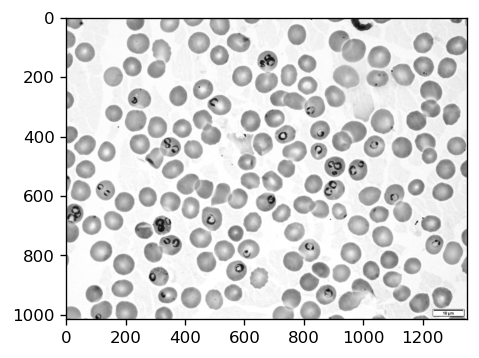

In [8]:
import imageio
I = imageio.imread('malaria.jpg', as_gray=True)
I = np.float64(I)/255.
pl.imshow(I, cmap='gray', vmin=0, vmax=1)

In [9]:
I.shape

(1016, 1350)

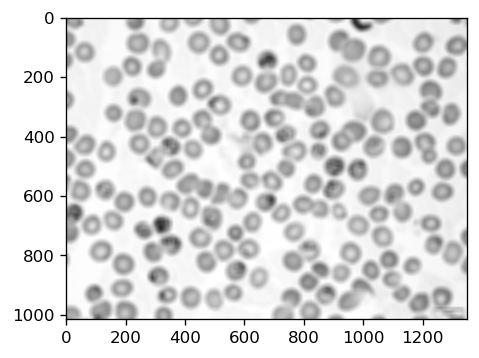

In [10]:
from scipy import ndimage as img
h3 = np.ones((20, 20))
h3 /= h3.sum()

I3 = img.convolve(I, h3, mode='nearest')
pl.imshow(I3, cmap='gray', vmin=0, vmax=1)

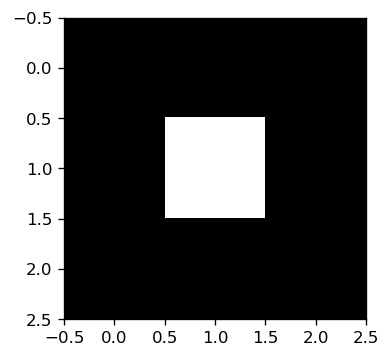

In [11]:
h4 = np.asarray([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
pl.imshow(h4, cmap='gray')

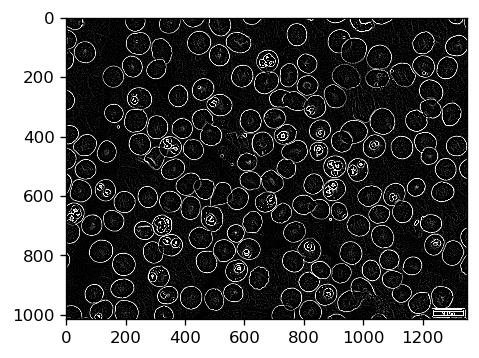

In [12]:
I4 = img.convolve(I, h4, mode='nearest')

pl.imshow(I4, cmap='gray', vmin=0, vmax=0.1)

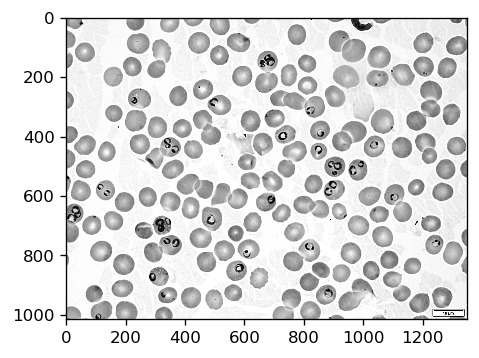

In [13]:
h5 = np.asarray([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
I5 = img.convolve(I, h5, mode='nearest')

pl.imshow(I5, cmap='gray', vmin=0, vmax=1)

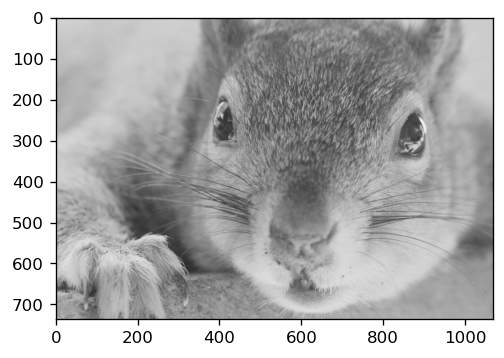

In [14]:
J = imageio.imread('squirrel.png', as_gray=True)
J = np.float64(J)/255.
pl.imshow(J, cmap='gray', vmin=0, vmax=1)

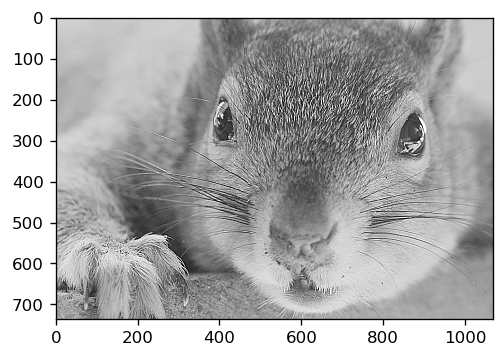

In [15]:
J5 = img.convolve(J, h5, mode='nearest')
pl.imshow(J5, cmap='gray', vmin=0, vmax=1)